CHECKING THE TEXT

In [1]:
file = open("C:/Users/Sangamithra/CIP/CIP implementation/text files/student1.txt", 'rt', encoding="iso-8859-1")
data = file.read()
words = data.split()

print('Number of words in text file :' , len(words))

Number of words in text file : 89


In [4]:
file = open("C:/Users/Sangamithra/CIP/CIP implementation/text files/student1.txt", 'rt', encoding="iso-8859-1")
data = file.read()
no_of_characters= len(data)

print('Number of characters in text file :' , no_of_characters)

Number of characters in text file : 568


In [5]:
# Python program to count the  
# number of lines in a text file 
  
  
# Opening a file 
file = open("C:/Users/Sangamithra/CIP/CIP implementation/text files/student1.txt","r") 
Counter = 0
  
# Reading from file 
Content = file.read() 
CoList = Content.split("\n") 
  
for i in CoList: 
    if i: 
        Counter += 1
          
print("This is the number of lines in the file") 
print(Counter) 

This is the number of lines in the file
12


In [6]:
with open("C:/Users/Sangamithra/CIP/CIP implementation/text files/student1.txt", "r") as f:
    count = f.read().count('.')
print("This is the number of sentences in the file") 
print (count)

This is the number of sentences in the file
4


WORD BALANCING

In [7]:
for line in open('C:/Users/Sangamithra/CIP/CIP implementation/text files/student1.txt'):       
    # Use file iterators to read by lines 
    print(line.lower(), end='')  

a program that convrts instructions into a machin code or lower level form so that they can be read and excuted by a computer.
the analyss part breaks up the source program into constituent pieces. the synthesis part constrcts the target program from the intermediate code.
symbol table is used to store the infrmation about the occurrence of various entties.
lexical analysis
syntax analysis or parsing
semantic analysis
intermediate code genration
code optimization
code generation
works on smallest class of grammar
few number of states
smple and fast construction


MODULE-1

SPELL CHECK

In [1]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
f = open('C:/Users/Sangamithra/CIP/CIP implementation/text files/student1.txt', 'r')
lines = f.readlines()
text = ' '.join([line.strip() for line in lines])
#with open(r'/content/gdrive/My Drive/input_py.txt', 'r') as fin:  
    #for line in fin: 
        #text=line.split()
        #matches = tool.check(line)
#print(text)
matches = tool.check(text)
print("The matches in the file:")
print(matches)

The matches in the file:
[Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['converts'], 'offsetInContext': 15, 'context': 'A program that convrts instructions into a machin code or lowe...', 'offset': 15, 'errorLength': 7, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'A program that convrts instructions into a machin code or lower level form so that they can be read and excuted by a computer.'}), Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['machine', 'ma chin', 'mach in'], 'offsetInContext': 43, 'context': '...rogram that convrts instructions into a machin code or lower level form so that they c...', 'offset': 43, 'errorLength': 6, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'A program that convrts instructions into a machin code or lower level form so that they can be read and excuted by a computer.'}), Match({'ruleId': 'MORFOL

CORRECTION OF SPELLING ERRORS

In [2]:
my_mistakes = []
my_corrections = [] 
start_positions =[]
end_positions = []
#with open(r'/content/gdrive/My Drive/input_py.txt', 'r') as fin:   \n",
#    for lin in fin: \n",
#        my=lin.split(\",\")\n",
for rules in matches:
    if len(rules.replacements)>0:
        start_positions.append(rules.offset)
        end_positions.append(rules.errorLength+rules.offset)
        my_mistakes.append(text[rules.offset:rules.errorLength+rules.offset])
        my_corrections.append(rules.replacements[0])
      
print("\nThe corrected words are:") 
print(my_corrections)
my_new_text = list(text)
my_a=list(my_corrections) 
for m in range(len(start_positions)):
    for i in range(len(my_new_text)):
        my_new_text[start_positions[m]]=my_a[m]
        if (i>start_positions[m] and i<end_positions[m]):
            my_new_text[i]=""
        
my_new_text = "".join(my_new_text)
print("\nThe final corrected text is:")
my_new_text


The corrected words are:
['converts', 'machine', 'executed', 'analysis', 'constructs', 'information', 'entities', 'Generation', 'Simple', 'construction.']

The final corrected text is:


'A program that converts instructions into a machine code or lower level form so that they can be read and executed by a computer. The analysis part breaks up the source program into constituent pieces. The synthesis part constructs the target program from the intermediate code. Symbol table is used to store the information about the occurrence of various entities. Lexical Analysis Syntax analysis or parsing Semantic Analysis Intermediate Code Generation Code Optimization Code Generation Works on smallest class of grammar Few number of states Simple and fast construction.'

MODULE-2

GRAMMAR CHECK

In [3]:
# Import the package
from gingerit.gingerit import GingerIt
# Text with spelling and grammatical mistakes
text = "A program that convrts instructions into a machin code or lower level form so that they can be read and excuted by a computer.The analyss part breaks up the source program into constituent pieces. The synthesis part constrcts the target program from the intermediate code.Symbol table is used to store the infrmation about the occurrence of various entties.Lexical Analysis Syntax analysis or parsing Semantic Analysis Intermediate Code Genration Code Optimization Code Generation. Works on smallest class of grammar Few number of states Smple and fast construction."
# Create an object of Gingerit package and pass the text as an paramater to it parse function

result = GingerIt().parse(text)
result

{'text': 'A program that convrts instructions into a machin code or lower level form so that they can be read and excuted by a computer.The analyss part breaks up the source program into constituent pieces. The synthesis part constrcts the target program from the intermediate code.Symbol table is used to store the infrmation about the occurrence of various entties.Lexical Analysis Syntax analysis or parsing Semantic Analysis Intermediate Code Genration Code Optimization Code Generation. Works on smallest class of grammar Few number of states Smple and fast construction.',
 'result': 'A program that converts instructions into a machine code or lower level form so that they can be read and executed by a computer. The analysis part breaks up the source program into constituent pieces. The synthesis part constructs the target program from the intermediate code. The symbol table is used to store the information about the occurrence of various entities. Lexical Analysis, Syntax analysis or p

In [4]:
# Number of mistakes in the original text

len(result['corrections'])

13

In [5]:
# List of mistakes in dictionary format as starting index, mistaken text, corrected text, definition of the corrected text

for i in range(len(result['corrections'])):
  print(result['corrections'][i])

{'start': 538, 'text': 'Smple', 'correct': 'simple', 'definition': 'having few parts; not complex or complicated or involved'}
{'start': 365, 'text': 'Analysis Syntax', 'correct': 'Analysis, Syntax', 'definition': 'Accept comma addition'}
{'start': 356, 'text': '.', 'correct': '. ', 'definition': 'Accept space'}
{'start': 349, 'text': 'entties', 'correct': 'entities', 'definition': 'that which is perceived or known or inferred to have its own distinct existence (living or nonliving)'}
{'start': 306, 'text': 'infrmation', 'correct': 'information', 'definition': 'a message received and understood'}
{'start': 272, 'text': 'Symbol table', 'correct': 'The symbol table', 'definition': None}
{'start': 271, 'text': '.', 'correct': '. ', 'definition': 'Accept space'}
{'start': 216, 'text': 'constrcts', 'correct': 'constructs', 'definition': 'make by combining materials and parts'}
{'start': 130, 'text': 'analyss', 'correct': 'analysis', 'definition': 'an investigation of the component parts of 

In [6]:
# Print the corrected text

print("Original Text: ", result['text'])
print("\n")
print("Corrected Text: ", result['result'])

Original Text:  A program that convrts instructions into a machin code or lower level form so that they can be read and excuted by a computer.The analyss part breaks up the source program into constituent pieces. The synthesis part constrcts the target program from the intermediate code.Symbol table is used to store the infrmation about the occurrence of various entties.Lexical Analysis Syntax analysis or parsing Semantic Analysis Intermediate Code Genration Code Optimization Code Generation. Works on smallest class of grammar Few number of states Smple and fast construction.


Corrected Text:  A program that converts instructions into a machine code or lower level form so that they can be read and executed by a computer. The analysis part breaks up the source program into constituent pieces. The synthesis part constructs the target program from the intermediate code. The symbol table is used to store the information about the occurrence of various entities. Lexical Analysis, Syntax an

MODULE-3

STOPWORD REMOVAL

In [7]:
# Open the file in read mode 
text = open("C:/Users/Sangamithra/CIP/CIP implementation/text files/output.txt", 'rt', encoding="iso-8859-1") 
  
# Create an empty dictionary 
d = dict() 
  
# Loop through each line of the file 
for line in text: 
    # Remove the leading spaces and newline character 
    line = line.strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
  
# Print the contents of dictionary 
for key in list(d.keys()): 
    print(key, ":", d[key]) 

a : 3
program : 3
that : 2
converts : 1
instructions : 1
into : 2
machine : 1
code : 5
or : 2
lower : 1
level : 1
form : 1
so : 1
they : 1
can : 1
be : 1
read : 1
and : 2
executed : 1
by : 1
computer : 1
the : 7
analysis : 4
part : 2
breaks : 1
up : 1
source : 1
constituent : 1
pieces : 1
synthesis : 1
constructs : 1
target : 1
from : 1
intermediate : 2
symbol : 1
table : 1
is : 1
used : 1
to : 1
store : 1
information : 1
about : 1
occurrence : 1
of : 3
various : 1
entities : 1
lexical : 1
syntax : 1
parsing : 1
semantic : 1
genration : 1
optimization : 1
generation : 1
works : 1
on : 1
smallest : 1
class : 1
grammar : 1
few : 1
number : 1
states : 1
simple : 1
fast : 1
construction : 1


In [5]:
# load data
filename = 'C:/Users/Sangamithra/CIP/CIP implementation/text files/output.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])
#print (str(len(words)))

['program', 'converts', 'instructions', 'machine', 'code', 'lower', 'level', 'form', 'read', 'executed', 'computer', 'analysis', 'part', 'breaks', 'source', 'program', 'constituent', 'pieces', 'synthesis', 'part', 'constructs', 'target', 'program', 'intermediate', 'code', 'symbol', 'table', 'used', 'store', 'information', 'occurrence', 'various', 'entities', 'lexical', 'analysis', 'syntax', 'analysis', 'parsing', 'semantic', 'analysis', 'intermediate', 'code', 'genration', 'code', 'optimization', 'code', 'generation', 'works', 'smallest', 'class', 'grammar', 'number', 'states', 'simple', 'fast', 'construction']


In [10]:
print ('Number of words after stopword removal: ',str(len(words)))

Number of words after stopword removal:  54


RAPID KEYWORD EXTRACTION ALGORITHM

In [6]:
import RAKE
import operator

stop_dir='C:/Users/Sangamithra/CIP/CD project-1/Descriptive-Answer-Evaluation-System-Master/data/stoplists/SmartStoplist.txt'
rake_object=RAKE.Rake(stop_dir)

def Sort_Tuple(tup):
    tup.sort(key = lambda x: x[1])
    return tup

sample_file = open("C:/Users/Sangamithra/CIP/CIP implementation/text files/output.txt", 'r', encoding="iso-8859-1")
text = sample_file.read()

keywords = Sort_Tuple(rake_object.run(text))
print("keywords: ",keywords)

keywords:  [('read', 1.0), ('executed', 1.0), ('computer', 1.0), ('store', 1.0), ('information', 1.0), ('occurrence', 1.0), ('grammar', 1.0), ('number', 1.0), ('program', 1.6666666666666667), ('source program', 3.666666666666667), ('target program', 3.666666666666667), ('converts instructions', 4.0), ('constituent pieces', 4.0), ('smallest class', 4.0), ('states simple', 4.0), ('fast construction', 4.0), ('machine code', 5.0), ('lower level form', 9.0), ('synthesis part constructs', 9.0), ('analysis part breaks', 10.333333333333332), ('intermediate code symbol table', 15.0), ('entities lexical analysis syntax analysis', 23.666666666666664)]


MODULE-4 AND MODULE-5

SUBJECTIVE ANSWER EVALUATION

In [12]:
import tkinter as tk 

What is a compiler?
Keyword in original file =  ['compiler', 'program', 'language', 'source', 'errors', 'equivalent', 'target']
No of keywords in original file =  7
Detected = convert high level language
Detected = machine language
Detected = compiler
Detected = program
Count =  4
No. of Errors =  0
Marks obtained after parsing = 10 /10
Marks obtained out of 50 is = 40 /50
Explain briefly about the parts of a compilation.
Keyword in original file =  ['analysis', 'synthesis', 'compilation', 'intermediate representation', 'source program', 'target program', 'two', 'breaks', 'constructs']
No of keywords in original file =  9
Detected = synthesis part builds target program
Detected = synthesis part builds target program
Detected = analysis part breaks
Detected = analysis part breaks
Detected = synthesis part
Detected = analysis part
Detected = source program
Detected = intermediate representation
Detected = compilation
Count =  9
No. of Errors =  0
Marks obtained after parsing = 10 /10
Mar

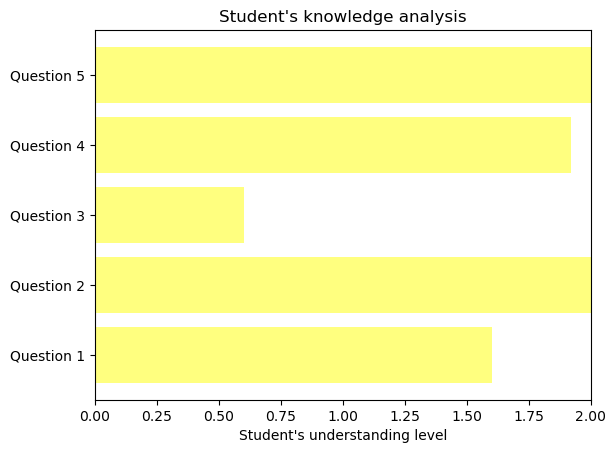

In [1]:
from __future__ import absolute_import
from __future__ import print_function
import six

import language_check

from tkinter import *
from tkinter import messagebox

import rake
import operator
import io

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

counter=1
file=open("C:/Users/Sangamithra/CIP/Subjective-Answer-Evaluation/questions.txt","r")
q=[line.rstrip('\n') for line in file]
totmark=[0,0,0,0,0]

def nex():
    global counter
    if(counter<5):
        counter=counter+1
        ques.set(str(q[counter-1]))
        
    else:
        messagebox.showwarning("Limit Exceeded","Sorry, No more questions available!")

def prev():
    global counter
    if(counter>1):
        counter=counter-1
        ques.set(str(q[counter-1]))
    else:
        messagebox.showwarning("Limit Exceeded","This is the first question!")

def finish():  
    s=0
    for i in totmark:
        s=s+i
    one = str(totmark[0])
    two = str(totmark[1])
    three = str(totmark[2])
    four = str(totmark[3])
    five = str(totmark[4])
    for i in range(5):
        if totmark[i]<=0.5:
            if i==0:
                rem1 = "Not Known"
            if i==1:
                rem2 = "Not Known"
            if i==2:
                rem3 = "Not Known"
            if i==3:
                rem4 = "Not Known"
            if i==4:
                rem5 = "Not Known"     
        if totmark[i]>0.5 and totmark[i]<=1:
            if i==0:
                rem1 = "Vaguely Understood"
            if i==1:
                rem2 = "Vaguely Understood"
            if i==2:
                rem3 = "Vaguely Understood"
            if i==3:
                rem4 = "Vaguely Understood"
            if i==4:
                rem5 = "Vaguely Understood"
        if totmark[i]>1 and totmark[i]<=1.5:
            if i==0:
                rem1 = "Moderately Understood"
            if i==1:
                rem2 = "Moderately Understood"
            if i==2:
                rem3 = "Moderately Understood"
            if i==3:
                rem4 = "Moderately Understood"
            if i==4:
                rem5 = "Moderately Understood"
        if totmark[i]>1.5:
            if i==0:
                rem1 = "Satisfactory"
            if i==1:
                rem2 = "Satisfactory"
            if i==2:
                rem3 = "Satisfactory"
            if i==3:
                rem4 = "Satisfactory"
            if i==4:
                rem5 = "Satisfactory" 
    messagebox.showinfo("Results","Marks for first question = "+one+"\nMarks for second question = "+two+"\nMarks for third question = "+three+"\nMarks for fourth question = "+four+"\nMarks for fifth question = "+five+"\n\nThe total score obtained in the test="+str(s)+"/10\n\nRemarks from the teacher : \n\tFor Question 1: "+rem1+"\n\tFor Question 2: "+rem2+"\n\tFor Question 3: "+rem3+"\n\tFor Question 4: "+rem4+"\n\tFor Question 5: "+rem5)  

def enFunc():
    
    global counter
    
    ans = entry.get('1.0','end')
    n=0
    for line in ans:
        words=[line.split(' ') for line in ans]
    n=len(words)
    if(n>=37):
        marks1=5
    elif(n>=27):
        marks1=3
    else:
        marks1=0
            
    a=marks1
    
    fname="C:/Users/Sangamithra/CIP/Subjective-Answer-Evaluation/docs/mp"+str(counter)+".txt"


    stoppath = "C:/Users/Sangamithra/CIP/Subjective-Answer-Evaluation/stoplists/SmartStoplist.txt"

    rake_object = rake.Rake(stoppath)
    sample_file = io.open(fname, 'r',encoding="iso-8859-1")
    text = ans

    sentenceList = rake.split_sentences(text)
    stopwords = rake.load_stop_words(stoppath)
    stopwordpattern = rake.build_stop_word_regex(stoppath)
    phraseList = rake.generate_candidate_keywords(sentenceList, stopwordpattern, stopwords)

    wordscores = rake.calculate_word_scores(phraseList)

    keywordcandidates = rake.generate_candidate_keyword_scores(phraseList, wordscores)
    keyw=dict(rake_object.run(text))
    f1=io.open(fname, 'r',encoding="iso-8859-1")
    text1=f1.read()
    que=text1.split("\n")
    print(que[0])
    l=text1.split("\n\n")
    kw=l[2].split("\n")
    print("Keyword in original file = ",kw)
    total=len(kw)
    print("No of keywords in original file = ",total)

    c=0
    for i in keyw:
        for j in range(0,total):
            if(kw[j].lower() in i.lower()):
                print("Detected = " +str(i))
                c=c+1
    print("Count = ",c)

    percentage=(c/total)*100

    if(percentage>=90):
        marks2=35
        message = "Marks obtained for keyword:" + str(marks2) + "/30"

    elif(percentage>=80 and percentage<90):
        marks2=33
        message = "Marks obtained for keyword:"+ str(marks2) + "/30"

    elif(percentage>=70 and percentage<80):
        marks2=30
        message = "Marks obtained for keyword:" + str(marks2) + "/30"

    elif(percentage>=60 and percentage<80):
        marks2=27
        message = "Marks obtained for keyword:" + str(marks2) + "/30"

    elif(percentage>=50 and percentage<60):
        marks2=25
        message = "Marks obtained for keyword:" + str(marks2) + "/30"

    elif(percentage>=40 and percentage<50): 
        marks2=20
        message = "Marks obtained for keyword:" + str(marks2) + "/30"
        
    else:
        marks2 = 0
        message = "Marks obtained for keyword:" + str(marks2) + "/30"
   
    b=marks2

    tool=language_check.LanguageTool('en-US')

    count=0
    text=str(ans)
    txtlen=len(text.split())
    setxt = set(text.split())
    setlen = len(setxt)
    matches=tool.check(text)
    print("No. of Errors = ",len(matches))
    noOfError=len(matches)
    for i in range (0,noOfError):
        print(matches[i].msg)
    
    if (noOfError<=3 and n>0):
        marks3=10
    elif (noOfError<=5):
        marks3=8
    elif (noOfError<=8):
        marks3=5
    else:
        marks3=0
    print("Marks obtained after parsing =",marks3,"/10")
    c=marks3
    d=a+b+c

    print("Marks obtained out of 50 is =",d,"/50")
    tot=(d/50)*2
    global totmark
    totmark[counter-1]=tot

def showrpt():
    objects = ('Question 1', 'Question 2', 'Question 3','Question 4','Question 5')
    y_pos = np.arange(len(objects))
    performance = [totmark[0],totmark[1],totmark[2],totmark[3],totmark[4]]
    plt.xlim(0, 2)
    plt.barh(y_pos, performance, align='center', alpha=0.5,color="yellow")
    plt.yticks(y_pos, objects)

    plt.xlabel('Student\'s understanding level')
    plt.title('Student\'s knowledge analysis')
    plt.show() 

root = Tk()
root.geometry('800x1800')
label= Label(root,text="ANSWER ALL THE FOLLOWING QUESTIONS",bg="lightyellow",bd=20)
label.place(x=300,y=10)

ques= StringVar()
ques.set(str(q[counter-1]))
labelQ=Label(root,textvariable=ques,text=str(q[0]),width=100, bg="lightyellow", bd=20)
labelQ.place(x=10,y=100)

entry= Text(root)
entry.place(x=100,y=200)

prevBtn= Button(root, text = '<', command = prev)
prevBtn.place(x=120,y=600)

button1= Button(root, text = 'Submit', command = enFunc)
button1.place(x=400,y=600)

nextBtn= Button(root, text = '>', command = nex)
nextBtn.place(x=700,y=600)

finishbtn=Button(root,text='Finish',command=finish)
finishbtn.place(x=300,y=650)

showrpt=Button(root,text='Show report',command=showrpt)
showrpt.place(x=500,y=650)

root.mainloop()

EVALUATION PARAMETERS

SHANNON'S ENTROPY

In [16]:
import collections
import math
 
 
def estimate_shannon_entropy(dna_sequence):
    m = len(dna_sequence)
    bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
 
    shannon_entropy_value = 0
    for base in bases:
        # number of residues
        n_i = bases[base]
        # n_i (# residues type i) / M (# residues in column)
        p_i = n_i / float(m)
        entropy_i = p_i * (math.log(p_i, 2))
        shannon_entropy_value += entropy_i
 
    return shannon_entropy_value * -1
print("Entropy of Teacher's Key answer:")
print(estimate_shannon_entropy(" LR parsers can be constructed to recognize most of the programming languages for which the context free grammar can be written. The class of grammar that can be parsed by LR parser is a superset of class of grammars that can be parsed using predictive parsers. LR parsers work using non backtracking shift reduce technique yet it is efficient one."))
print("Entropy of Student's Response:")
print(estimate_shannon_entropy("Works on smallest class of grammar Few number of states Simple and fast construction"))

Entropy of Teacher's Key answer:
4.198224622770984
Entropy of Student's Response:
4.067860128565114


PERPLEXITY

In [17]:
import math
import torch
from flair.embeddings import FlairEmbeddings

# get language model
model = FlairEmbeddings('news-forward').lm

# example text
text = 'LR parsers can be constructed to recognize most of the programming languages for which the context free grammar can be written. The class of grammar that can be parsed by LR parser is a superset of class of grammars that can be parsed using predictive parsers. LR parsers work using non backtracking shift reduce technique yet it is efficient one.'
input = torch.tensor([model.dictionary.get_idx_for_item(char) for char in text[:-1]]).unsqueeze(1)

# push list of character IDs through model
hidden = model.init_hidden(1)
prediction, _, hidden = model.forward(input, hidden)

# the target is always the next character
targets = torch.tensor([model.dictionary.get_idx_for_item(char) for char in text[1:]])

# use cross entropy loss to compare output of forward pass with targets
cross_entroy_loss = torch.nn.CrossEntropyLoss()
loss = cross_entroy_loss(prediction.view(-1, len(model.dictionary)), targets).item()

# exponentiate cross-entropy loss to calculate perplexity
perplexity = math.exp(loss)

print("Perplexity of Teacher's answer:")
print(perplexity)


text2='Works on smallest class of grammar Few number of states Simple and fast construction'
input = torch.tensor([model.dictionary.get_idx_for_item(char) for char in text2[:-1]]).unsqueeze(1)

# push list of character IDs through model
hidden = model.init_hidden(1)
prediction, _, hidden = model.forward(input, hidden)

# the target is always the next character
targets = torch.tensor([model.dictionary.get_idx_for_item(char) for char in text2[1:]])

# use cross entropy loss to compare output of forward pass with targets
cross_entroy_loss = torch.nn.CrossEntropyLoss()
loss = cross_entroy_loss(prediction.view(-1, len(model.dictionary)), targets).item()

# exponentiate cross-entropy loss to calculate perplexity
perplexity2 = math.exp(loss)

print("Perplexity of Student's answer:")
print(perplexity2)

Perplexity of Teacher's answer:
4.3326355678326784
Perplexity of Student's answer:
4.937745877508692


COSINE SIMILARITY

In [2]:
#Cosine similarity between two sentences

def Counter(m): 
	j= dict()
	for word in m:
		if word in j:			#word found-- increment count
			j[word]=j[word]+1
		else:				#word not found. Add to dictionary
			j.update({word:1})
	return j

def sqr(a):

     i=0.000
     while((i**2)<a):
     	i=i+0.000001	    
     return i
   
def take_cosine(vec1, vec2):

     intersection = set(vec1.keys()) & set(vec2.keys())
     n = sum([vec1[x] * vec2[x] for x in intersection]) #numerator
     
     sum1 = sum([vec1[x]**2 for x in vec1])
     sum2 = sum([vec2[x]**2 for x in vec2])
     d = sqr(sum1) * sqr(sum2)				#denominator

     if not d:
        return 0.0
     else:
        return float(n) / d

def text_to_vector(text):
     
     words =text.split()
     return Counter(words)

sentence1 = "A compiler is a program that reads a program written in one language- the source language and translates it into an equivalent program in another language-the target language. The compiler reports to its user the presence of errors in the source program "
sentence2 = "A compiler is a special program that processes statements written in a particular programming language and turns them into machine language\n"

vector1 = text_to_vector(sentence1)
vector2 = text_to_vector(sentence2)

cosine = take_cosine(vector1, vector2)

print ("Cosine similarity : ", round(cosine,5))

Cosine similarity :  0.49497


In [3]:
#Cosine similarity between two sentences

def Counter(m): 
	j= dict()
	for word in m:
		if word in j:			#word found-- increment count
			j[word]=j[word]+1
		else:				#word not found. Add to dictionary
			j.update({word:1})
	return j

def sqr(a):

     i=0.000
     while((i**2)<a):
     	i=i+0.000001	    
     return i
   
def take_cosine(vec1, vec2):

     intersection = set(vec1.keys()) & set(vec2.keys())
     n = sum([vec1[x] * vec2[x] for x in intersection]) #numerator
     
     sum1 = sum([vec1[x]**2 for x in vec1])
     sum2 = sum([vec2[x]**2 for x in vec2])
     d = sqr(sum1) * sqr(sum2)				#denominator

     if not d:
        return 0.0
     else:
        return float(n) / d

def text_to_vector(text):
     
     words =text.split()
     return Counter(words)

sentence1 = "Analysis and synthesis are the two parts of compilation. The analysis part breaks up the source program into constituent pieces and creates an intermediate representation of the source program. The synthesis part constructs the desired target program from the intermediate representation"
sentence2 = "There are two parts to compilation: analysis and synthesis."

vector1 = text_to_vector(sentence1)
vector2 = text_to_vector(sentence2)

cosine = take_cosine(vector1, vector2)

print ("Cosine similarity : ", round(cosine,5))

Cosine similarity :  0.22502


In [4]:
#Cosine similarity between two sentences

def Counter(m): 
	j= dict()
	for word in m:
		if word in j:			#word found-- increment count
			j[word]=j[word]+1
		else:				#word not found. Add to dictionary
			j.update({word:1})
	return j

def sqr(a):

     i=0.000
     while((i**2)<a):
     	i=i+0.000001	    
     return i
   
def take_cosine(vec1, vec2):

     intersection = set(vec1.keys()) & set(vec2.keys())
     n = sum([vec1[x] * vec2[x] for x in intersection]) #numerator
     
     sum1 = sum([vec1[x]**2 for x in vec1])
     sum2 = sum([vec2[x]**2 for x in vec2])
     d = sqr(sum1) * sqr(sum2)				#denominator

     if not d:
        return 0.0
     else:
        return float(n) / d

def text_to_vector(text):
     
     words =text.split()
     return Counter(words)


sentence1 = "The symbol table is a data structure containing a record for each identifier, with fields for the attributes of the identifier. The data structure alloes us to find the record for each identifier quickly and to store or retieve data from that record quickly. Whenever an identifier is detected by a lexical analyzer, it is entered into the symbol table. The attributes of an identifier is detected by a lexicla analyzer"
sentence2 = "Symbol Table is an important data structure created and maintained by the compiler in order to keep track of semantics of variable"

vector1 = text_to_vector(sentence1)
vector2 = text_to_vector(sentence2)

cosine = take_cosine(vector1, vector2)

print ("Cosine similarity : ", round(cosine,5))

Cosine similarity :  0.3935


In [5]:
#Cosine similarity between two sentences

def Counter(m): 
	j= dict()
	for word in m:
		if word in j:			#word found-- increment count
			j[word]=j[word]+1
		else:				#word not found. Add to dictionary
			j.update({word:1})
	return j

def sqr(a):

     i=0.000
     while((i**2)<a):
     	i=i+0.000001	    
     return i
   
def take_cosine(vec1, vec2):

     intersection = set(vec1.keys()) & set(vec2.keys())
     n = sum([vec1[x] * vec2[x] for x in intersection]) #numerator
     
     sum1 = sum([vec1[x]**2 for x in vec1])
     sum2 = sum([vec2[x]**2 for x in vec2])
     d = sqr(sum1) * sqr(sum2)				#denominator

     if not d:
        return 0.0
     else:
        return float(n) / d

def text_to_vector(text):
     
     words =text.split()
     return Counter(words)


sentence1 = "The following are the various phases of a a compiler : Lexical analyzer, Syntax analyzer, Semantic analyzer, Intermediate code generator, Code optimizer"
sentence2 = "We basically have two phases of compilers, namely Analysis phase and Synthesis phase."

vector1 = text_to_vector(sentence1)
vector2 = text_to_vector(sentence2)

cosine = take_cosine(vector1, vector2)

print ("Cosine similarity : ", round(cosine,5))

Cosine similarity :  0.10127


In [6]:
#Cosine similarity between two sentences

def Counter(m): 
	j= dict()
	for word in m:
		if word in j:			#word found-- increment count
			j[word]=j[word]+1
		else:				#word not found. Add to dictionary
			j.update({word:1})
	return j

def sqr(a):

     i=0.000
     while((i**2)<a):
     	i=i+0.000001	    
     return i
   
def take_cosine(vec1, vec2):

     intersection = set(vec1.keys()) & set(vec2.keys())
     n = sum([vec1[x] * vec2[x] for x in intersection]) #numerator
     
     sum1 = sum([vec1[x]**2 for x in vec1])
     sum2 = sum([vec2[x]**2 for x in vec2])
     d = sqr(sum1) * sqr(sum2)				#denominator

     if not d:
        return 0.0
     else:
        return float(n) / d

def text_to_vector(text):
     
     words =text.split()
     return Counter(words)

sentence1 = "LR parsers are constructed to recognise most of the programming languages for which the context free grammar can be written. The class of grammar that can be parsed by LR parser us a superset of class odf grammars that can be parsed using predictive parsers. LR parsers work using non backtracking shift reduce technique yet it is sufficient one "
sentence2 = "The LR parser is a non recursive, shift reduce, bottom up parser. It uses a wide class of context-free grammar"


vector1 = text_to_vector(sentence1)
vector2 = text_to_vector(sentence2)

cosine = take_cosine(vector1, vector2)

print ("Cosine similarity : ", round(cosine,5))

Cosine similarity :  0.368


JACCARD SIMILARITY

In [7]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")


document_1 = "A compiler is a program that reads a program written in one language- the source language and translates it into an equivalent program in another language-the target language. The compiler reports to its user the presence of errors in the source program"
document_2 = "A compiler is a special program that processes statements written in a particular programming language and turns them into machine language"

all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
 
    
jaccard_similarity(tokenized_documents[0],tokenized_documents[1])

0.2631578947368421

In [8]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")


document_1 = "Analysis and synthesis are the two parts of compilation. The analysis part breaks up the source program into constituent pieces and creates an intermediate representation of the source program. The synthesis part constructs the desired target program from the intermediate representation"
document_2 = "There are two parts to compilation: analysis and synthesis."

all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
 
    
jaccard_similarity(tokenized_documents[0],tokenized_documents[1])

0.16666666666666666

In [9]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")


document_1 = "The symbol table is a data structure containing a record for each identifier, with fields for the attributes of the identifier. The data structure alloes us to find the record for each identifier quickly and to store or retieve data from that record quickly. Whenever an identifier is detected by a lexical analyzer, it is entered into the symbol table. The attributes of an identifier is detected by a lexicla analyzer"
document_2 = "Symbol Table is an important data structure created and maintained by the compiler in order to keep track of semantics of variable"

all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
 
    
jaccard_similarity(tokenized_documents[0],tokenized_documents[1])

0.21153846153846154

In [10]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")


document_1 = "The following are the various phases of a a compiler : Lexical analyzer, Syntax analyzer, Semantic analyzer, Intermediate code generator, Code optimizer"
document_2 = "We basically have two phases of compilers, namely Analysis phase and Synthesis phase."

all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
 
    
jaccard_similarity(tokenized_documents[0],tokenized_documents[1])

0.07142857142857142

In [11]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")

document_1 = "LR parsers are constructed to recognise most of the programming languages for which the context free grammar can be written. The class of grammar that can be parsed by LR parser us a superset of class odf grammars that can be parsed using predictive parsers. LR parsers work using non backtracking shift reduce technique yet it is sufficient one "
document_2 = "The LR parser is a non recursive, shift reduce, bottom up parser. It uses a wide class of context-free grammar"

all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
 
    
jaccard_similarity(tokenized_documents[0],tokenized_documents[1])

0.21153846153846154

TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY

In [12]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")

document_1 = "A compiler is a program that reads a program written in one language- the source language and translates it into an equivalent program in another language-the target language. The compiler reports to its user the presence of errors in the source program"
document_2 = "A compiler is a special program that processes statements written in a particular programming language and turns them into machine language"


all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def term_frequency(term, tokenized_document):
    return tokenized_document.count(term)
 
def sublinear_term_frequency(term, tokenized_document):
    count = tokenized_document.count(term)
    if count == 0:
        return 0
    return 1 + math.log(count)
 
def augmented_term_frequency(term, tokenized_document):
    max_count = max([term_frequency(t, tokenized_document) for t in tokenized_document])
    return (0.5 + ((0.5 * term_frequency(term, tokenized_document))/max_count))
 
def inverse_document_frequencies(tokenized_documents):
    idf_values = {}
    all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])
    for tkn in all_tokens_set:
        contains_token = map(lambda doc: tkn in doc, tokenized_documents)
        idf_values[tkn] = 1 + math.log(len(tokenized_documents)/(sum(contains_token)))
    return idf_values
 
def tfidf(documents):
    tokenized_documents = [tokenize(d) for d in documents]
    idf = inverse_document_frequencies(tokenized_documents)
    tfidf_documents = []
    for document in tokenized_documents:
        doc_tfidf = []
        for term in idf.keys():
            tf = sublinear_term_frequency(term, document)
            doc_tfidf.append(tf * idf[term])
        tfidf_documents.append(doc_tfidf)
    return tfidf_documents

idf_values = inverse_document_frequencies(tokenized_documents)
print(idf_values['program'])

1.0


In [13]:
tfidf_representation = tfidf(all_documents)
print(tfidf_representation[0],document_2)

[1.6931471805599454, 2.09861228866811, 1.6931471805599454, 1.6931471805599454, 1.0, 1.6931471805599454, 0.0, 1.6931471805599454, 1.6931471805599454, 1.0, 1.6931471805599454, 2.386294361119891, 2.09861228866811, 0.0, 1.6931471805599454, 0.0, 0.0, 1.6931471805599454, 1.6931471805599454, 2.8667473750380923, 1.6931471805599454, 1.0, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 4.040347569516239, 1.0, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 0.0, 1.6931471805599454, 0.0, 1.0, 0.0, 0.0, 1.6931471805599454, 1.0] A compiler is a special program that processes statements written in a particular programming language and turns them into machine language


In [14]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")


document_1 = "Analysis and synthesis are the two parts of compilation. The analysis part breaks up the source program into constituent pieces and creates an intermediate representation of the source program. The synthesis part constructs the desired target program from the intermediate representation"
document_2 = "There are two parts to compilation: analysis and synthesis."

all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def term_frequency(term, tokenized_document):
    return tokenized_document.count(term)
 
def sublinear_term_frequency(term, tokenized_document):
    count = tokenized_document.count(term)
    if count == 0:
        return 0
    return 1 + math.log(count)
 
def augmented_term_frequency(term, tokenized_document):
    max_count = max([term_frequency(t, tokenized_document) for t in tokenized_document])
    return (0.5 + ((0.5 * term_frequency(term, tokenized_document))/max_count))
 
def inverse_document_frequencies(tokenized_documents):
    idf_values = {}
    all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])
    for tkn in all_tokens_set:
        contains_token = map(lambda doc: tkn in doc, tokenized_documents)
        idf_values[tkn] = 1 + math.log(len(tokenized_documents)/(sum(contains_token)))
    return idf_values
 
def tfidf(documents):
    tokenized_documents = [tokenize(d) for d in documents]
    idf = inverse_document_frequencies(tokenized_documents)
    tfidf_documents = []
    for document in tokenized_documents:
        doc_tfidf = []
        for term in idf.keys():
            tf = sublinear_term_frequency(term, document)
            doc_tfidf.append(tf * idf[term])
        tfidf_documents.append(doc_tfidf)
    return tfidf_documents

idf_values = inverse_document_frequencies(tokenized_documents)
print(idf_values['the'])

1.6931471805599454


In [15]:
tfidf_representation = tfidf(all_documents)
print(tfidf_representation[0],document_2)

[1.6931471805599454, 1.0, 2.8667473750380923, 0.0, 1.6931471805599454, 0.0, 1.6931471805599454, 2.8667473750380923, 1.0, 1.6931471805599454, 2.8667473750380923, 1.6931471805599454, 2.8667473750380923, 1.6931471805599454, 0.0, 0.0, 2.8667473750380923, 2.8667473750380923, 1.6931471805599454, 1.0, 2.8667473750380923, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 4.9878594630559325, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454] There are two parts to compilation: analysis and synthesis.


In [16]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")

document_1 = "The symbol table is a data structure containing a record for each identifier, with fields for the attributes of the identifier. The data structure alloes us to find the record for each identifier quickly and to store or retieve data from that record quickly. Whenever an identifier is detected by a lexical analyzer, it is entered into the symbol table. The attributes of an identifier is detected by a lexicla analyzer"
document_2 = "Symbol Table is an important data structure created and maintained by the compiler in order to keep track of semantics of variable"


all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def term_frequency(term, tokenized_document):
    return tokenized_document.count(term)
 
def sublinear_term_frequency(term, tokenized_document):
    count = tokenized_document.count(term)
    if count == 0:
        return 0
    return 1 + math.log(count)
 
def augmented_term_frequency(term, tokenized_document):
    max_count = max([term_frequency(t, tokenized_document) for t in tokenized_document])
    return (0.5 + ((0.5 * term_frequency(term, tokenized_document))/max_count))
 
def inverse_document_frequencies(tokenized_documents):
    idf_values = {}
    all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])
    for tkn in all_tokens_set:
        contains_token = map(lambda doc: tkn in doc, tokenized_documents)
        idf_values[tkn] = 1 + math.log(len(tokenized_documents)/(sum(contains_token)))
    return idf_values
 
def tfidf(documents):
    tokenized_documents = [tokenize(d) for d in documents]
    idf = inverse_document_frequencies(tokenized_documents)
    tfidf_documents = []
    for document in tokenized_documents:
        doc_tfidf = []
        for term in idf.keys():
            tf = sublinear_term_frequency(term, document)
            doc_tfidf.append(tf * idf[term])
        tfidf_documents.append(doc_tfidf)
    return tfidf_documents

idf_values = inverse_document_frequencies(tokenized_documents)
print(idf_values['table'])

1.0


In [17]:
tfidf_representation = tfidf(all_documents)
print(tfidf_representation[0],document_2)

[1.6931471805599454, 0.0, 4.040347569516239, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 0.0, 0.0, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 2.386294361119891, 0.0, 2.8667473750380923, 1.6931471805599454, 1.6931471805599454, 2.09861228866811, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 0.0, 0.0, 2.8667473750380923, 1.6931471805599454, 1.6931471805599454, 1.0, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.0, 2.9459101490553135, 3.5532594796468646, 0.0, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 3.5532594796468646, 0.0, 0.0, 1.6931471805599454, 1.6931471805599454, 2.8667473750380923, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 0.0, 3.5532594796468646, 1.6931471805599454, 1.6931471805599454] Symbol Table is an important data structure created and maintained by the compiler in order to keep track of semantics of variable


In [18]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")

document_1 = "The following are the various phases of a compiler : Lexical analyzer, Syntax analyzer, Semantic analyzer, Intermediate code generator, Code optimizer"
document_2 = "We basically have two phases of compilers, namely Analysis phase and Synthesis phase."

all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def term_frequency(term, tokenized_document):
    return tokenized_document.count(term)
 
def sublinear_term_frequency(term, tokenized_document):
    count = tokenized_document.count(term)
    if count == 0:
        return 0
    return 1 + math.log(count)
 
def augmented_term_frequency(term, tokenized_document):
    max_count = max([term_frequency(t, tokenized_document) for t in tokenized_document])
    return (0.5 + ((0.5 * term_frequency(term, tokenized_document))/max_count))
 
def inverse_document_frequencies(tokenized_documents):
    idf_values = {}
    all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])
    for tkn in all_tokens_set:
        contains_token = map(lambda doc: tkn in doc, tokenized_documents)
        idf_values[tkn] = 1 + math.log(len(tokenized_documents)/(sum(contains_token)))
    return idf_values
 
def tfidf(documents):
    tokenized_documents = [tokenize(d) for d in documents]
    idf = inverse_document_frequencies(tokenized_documents)
    tfidf_documents = []
    for document in tokenized_documents:
        doc_tfidf = []
        for term in idf.keys():
            tf = sublinear_term_frequency(term, document)
            doc_tfidf.append(tf * idf[term])
        tfidf_documents.append(doc_tfidf)
    return tfidf_documents

idf_values = inverse_document_frequencies(tokenized_documents)
print(idf_values['of'])

1.0


In [19]:
tfidf_representation = tfidf(all_documents)
print(tfidf_representation[0],document_2)

[0.0, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 0.0, 1.0, 1.6931471805599454, 0.0, 0.0, 1.0, 0.0, 1.6931471805599454, 0.0, 2.8667473750380923, 0.0, 1.6931471805599454, 2.8667473750380923, 0.0, 3.5532594796468646, 0.0, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 0.0, 1.6931471805599454, 0.0] We basically have two phases of compilers, namely Analysis phase and Synthesis phase.


In [20]:
from __future__ import division
import string
import math
 
tokenize = lambda doc: doc.lower().split(" ")

document_1 = "LR parsers are constructed to recognise most of the programming languages for which the context free grammar can be written. The class of grammar that can be parsed by LR parser us a superset of class odf grammars that can be parsed using predictive parsers. LR parsers work using non backtracking shift reduce technique yet it is sufficient one "
document_2 = "The LR parser is a non recursive, shift reduce, bottom up parser. It uses a wide class of context-free grammar"


all_documents = [document_1, document_2]

tokenized_documents = [tokenize(d) for d in all_documents]
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

def term_frequency(term, tokenized_document):
    return tokenized_document.count(term)
 
def sublinear_term_frequency(term, tokenized_document):
    count = tokenized_document.count(term)
    if count == 0:
        return 0
    return 1 + math.log(count)
 
def augmented_term_frequency(term, tokenized_document):
    max_count = max([term_frequency(t, tokenized_document) for t in tokenized_document])
    return (0.5 + ((0.5 * term_frequency(term, tokenized_document))/max_count))
 
def inverse_document_frequencies(tokenized_documents):
    idf_values = {}
    all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])
    for tkn in all_tokens_set:
        contains_token = map(lambda doc: tkn in doc, tokenized_documents)
        idf_values[tkn] = 1 + math.log(len(tokenized_documents)/(sum(contains_token)))
    return idf_values
 
def tfidf(documents):
    tokenized_documents = [tokenize(d) for d in documents]
    idf = inverse_document_frequencies(tokenized_documents)
    tfidf_documents = []
    for document in tokenized_documents:
        doc_tfidf = []
        for term in idf.keys():
            tf = sublinear_term_frequency(term, document)
            doc_tfidf.append(tf * idf[term])
        tfidf_documents.append(doc_tfidf)
    return tfidf_documents

idf_values = inverse_document_frequencies(tokenized_documents)
print(idf_values['are'])

1.6931471805599454


In [21]:
tfidf_representation = tfidf(all_documents)
print(tfidf_representation[0],document_2)

[1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.0, 1.6931471805599454, 0.0, 0.0, 1.6931471805599454, 1.6931471805599454, 0.0, 2.8667473750380923, 3.5532594796468646, 1.6931471805599454, 1.0, 1.6931471805599454, 1.6931471805599454, 1.0, 1.0, 1.6931471805599454, 0.0, 2.09861228866811, 2.8667473750380923, 1.6931471805599454, 1.6931471805599454, 0.0, 3.5532594796468646, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 0.0, 1.0, 2.8667473750380923, 1.6931471805599454, 2.09861228866811, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 2.09861228866811, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 0.0, 0.0, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.0, 2.8667473750380923] The LR parser is a non recursive, shift reduce, bottom up parser. It uses a wide class of context-free grammar
